# Simple Nueral Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import itertools

In [122]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose','diagnosis_tokenized'])
display(df.head())


,hadm_id,subject_id,expire_flag,diagnosis,admission_type,age,admission_type_encoded,0,1,2,...,18,19,20,21,22,23,24,a,b,range
0,137275,9319,0,LEFT RENAL CA/SDA,ELECTIVE,82,0,118.0,97.0,97.0,...,115.0,115.0,133.0,133.0,142.0,142.0,99.0,1,0.0,82.0
1,125380,31585,0,PNEUMONIA,EMERGENCY,300,1,118.0,127.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,20.0
2,132722,1426,0,LEFT FRONTAL HEMORRHAGE,EMERGENCY,80,1,104.0,104.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,101.0
3,101422,71582,0,AORTIC STENOSIS,EMERGENCY,76,1,106.0,134.0,132.0,...,178.0,164.0,140.0,0.0,0.0,0.0,0.0,16,0.0,88.0
4,139687,68501,0,CAROTID STENOSIS/SDA,ELECTIVE,86,0,162.0,180.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73,1.0,130.0


In [123]:
print(len(df[df.expire_flag == 0]))
print(len(df[df.expire_flag == 1]))

12217
1443


In [124]:
overfitting = df.loc[df['expire_flag'] == 1]

df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)

In [125]:
print(len(df))

23761


In [127]:
features = df.drop(columns=['hadm_id','subject_id','expire_flag',
                            'diagnosis','admission_type',])
pydf = df.values
print(pydf.shape)
X = pydf[:,5:35]
y = pydf[:,2]
print(X)
print(y)

(23761, 35)
[[82 0 118.0 ... 1 0.0 82.0]
 [300 1 118.0 ... 4 0.0 20.0]
 [80 1 104.0 ... -1 0.0 101.0]
 ...
 [75 1 255.0 ... 8 0.0 264.0]
 [72 1 185.0 ... 18 0.0 153.0]
 [63 1 108.0 ... 55 0.0 443.0]]
[0 0 0 ... 1 1 1]


In [128]:
print(X.shape)

(23761, 30)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)

(17820, 30)
(5941, 30)


### Modeling with a Simple Neural Network

In [131]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_dim=30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc_roc])
model.fit(X_train, y_train, epochs=250, batch_size=10)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))


Epoch 1/250
17820/17820 [==============================] - 3s 189us/step - loss: 1.5291 - acc: 0.5400 - auc_roc: 0.5262
Epoch 2/250
17820/17820 [==============================] - 2s 114us/step - loss: 0.7053 - acc: 0.5681 - auc_roc: 0.5585
Epoch 3/250
17820/17820 [==============================] - 2s 111us/step - loss: 0.6822 - acc: 0.5895 - auc_roc: 0.5749
Epoch 4/250
17820/17820 [==============================] - 2s 118us/step - loss: 0.6728 - acc: 0.5961 - auc_roc: 0.5871
Epoch 5/250
17820/17820 [==============================] - 2s 112us/step - loss: 0.6572 - acc: 0.6129 - auc_roc: 0.5983
Epoch 6/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.6471 - acc: 0.6280 - auc_roc: 0.6097
Epoch 7/250
17820/17820 [==============================] - 2s 114us/step - loss: 0.6411 - acc: 0.6302 - auc_roc: 0.6193
Epoch 8/250
17820/17820 [==============================] - 2s 113us/step - loss: 0.6398 - acc: 0.6338 - auc_roc: 0.6277
Epoch 9/250
17820/17820 [===============

17820/17820 [==============================] - 2s 108us/step - loss: 0.4964 - acc: 0.7457 - auc_roc: 0.7759
Epoch 69/250
17820/17820 [==============================] - 2s 116us/step - loss: 0.4945 - acc: 0.7440 - auc_roc: 0.7768
Epoch 70/250
17820/17820 [==============================] - 2s 109us/step - loss: 0.4985 - acc: 0.7449 - auc_roc: 0.7777
Epoch 71/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.4910 - acc: 0.7485 - auc_roc: 0.7785
Epoch 72/250
17820/17820 [==============================] - 2s 114us/step - loss: 0.4934 - acc: 0.7454 - auc_roc: 0.7794
Epoch 73/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.4931 - acc: 0.7463 - auc_roc: 0.7802
Epoch 74/250
17820/17820 [==============================] - 2s 109us/step - loss: 0.4890 - acc: 0.7469 - auc_roc: 0.7810
Epoch 75/250
17820/17820 [==============================] - 2s 110us/step - loss: 0.4909 - acc: 0.7489 - auc_roc: 0.7818
Epoch 76/250
17820/17820 [===================

17820/17820 [==============================] - 2s 113us/step - loss: 0.4675 - acc: 0.7582 - auc_roc: 0.8122
Epoch 136/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.4690 - acc: 0.7617 - auc_roc: 0.8126
Epoch 137/250
17820/17820 [==============================] - 2s 113us/step - loss: 0.4624 - acc: 0.7646 - auc_roc: 0.8129
Epoch 138/250
17820/17820 [==============================] - 2s 117us/step - loss: 0.4619 - acc: 0.7623 - auc_roc: 0.8132
Epoch 139/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.4646 - acc: 0.7617 - auc_roc: 0.8135
Epoch 140/250
17820/17820 [==============================] - 2s 116us/step - loss: 0.4624 - acc: 0.7638 - auc_roc: 0.8138
Epoch 141/250
17820/17820 [==============================] - 2s 114us/step - loss: 0.4647 - acc: 0.7635 - auc_roc: 0.8142
Epoch 142/250
17820/17820 [==============================] - 2s 115us/step - loss: 0.4624 - acc: 0.7669 - auc_roc: 0.8145
Epoch 143/250
17820/17820 [===========

17820/17820 [==============================] - 2s 124us/step - loss: 0.4472 - acc: 0.7755 - auc_roc: 0.8287
Epoch 203/250
17820/17820 [==============================] - 2s 116us/step - loss: 0.4479 - acc: 0.7781 - auc_roc: 0.8289
Epoch 204/250
17820/17820 [==============================] - 2s 110us/step - loss: 0.4430 - acc: 0.7769 - auc_roc: 0.8291
Epoch 205/250
17820/17820 [==============================] - 2s 113us/step - loss: 0.4490 - acc: 0.7742 - auc_roc: 0.8293
Epoch 206/250
17820/17820 [==============================] - 2s 112us/step - loss: 0.4479 - acc: 0.7754 - auc_roc: 0.8295
Epoch 207/250
17820/17820 [==============================] - 2s 114us/step - loss: 0.4473 - acc: 0.7763 - auc_roc: 0.8297
Epoch 208/250
17820/17820 [==============================] - 2s 122us/step - loss: 0.4424 - acc: 0.7769 - auc_roc: 0.8298
Epoch 209/250
17820/17820 [==============================] - 2s 119us/step - loss: 0.4564 - acc: 0.7687 - auc_roc: 0.8300
Epoch 210/250
17820/17820 [===========

In [137]:
from sklearn.metrics import roc_curve

y_pred = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

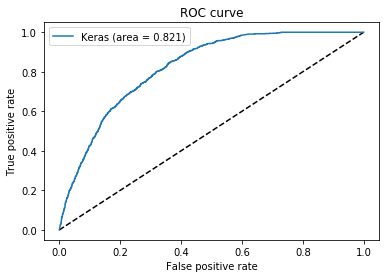

In [138]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [11]:
import tensorflow as tf
# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

### Confusion Matrix

Confusion matrix, without normalization
[[2127  952]
 [ 613 2249]]


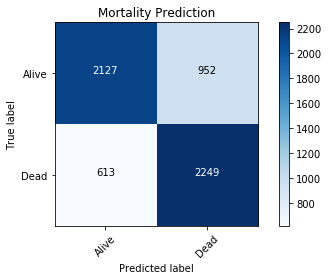

In [136]:
from sklearn.metrics import confusion_matrix 
labels = ['Alive','Dead']
y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.
y_pred = y_pred.reshape(-1)
y_pred = y_pred.astype(np.int64)
y_test = y_test.astype(np.int64)
#print(type(y_pred[1]))
#print(type(y_test[1]))
#print(y_test)
#print(y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,labels,title='Mortality Prediction')

In [135]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()